In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Border_Crossing_Entry_Data.csv")

In [3]:
# Column types and non-null values
print(df.info())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397152 entries, 0 to 397151
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Port Name  397152 non-null  object 
 1   State      397152 non-null  object 
 2   Port Code  397152 non-null  int64  
 3   Border     397152 non-null  object 
 4   Date       397152 non-null  object 
 5   Measure    397152 non-null  object 
 6   Value      397152 non-null  int64  
 7   Latitude   397152 non-null  float64
 8   Longitude  397152 non-null  float64
 9   Point      397152 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 30.3+ MB
None


In [4]:
# Statistical summary
print(df.describe())  


           Port Code         Value       Latitude      Longitude
count  397152.000000  3.971520e+05  397152.000000  397152.000000
mean     2446.232510  2.889394e+04      43.971354     -99.725142
std      1204.229428  1.495623e+05       8.152182      18.259343
min       101.000000  0.000000e+00      25.952000    -141.001000
25%      2304.000000  0.000000e+00      42.999000    -114.728000
50%      3012.000000  1.450000e+02      48.122000    -101.628000
75%      3401.000000  3.002000e+03      49.000000     -89.585000
max      3814.000000  4.447374e+06      62.615000     -66.980000


In [5]:
# Unique values per column
print(df.nunique())  


Port Name      116
State           14
Port Code      117
Border           2
Date           347
Measure         12
Value        61066
Latitude        71
Longitude      116
Point          116
dtype: int64


In [6]:
# Missing value percentage
print(df.isnull().sum() / len(df) * 100)  


Port Name    0.0
State        0.0
Port Code    0.0
Border       0.0
Date         0.0
Measure      0.0
Value        0.0
Latitude     0.0
Longitude    0.0
Point        0.0
dtype: float64


In [7]:
%pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 655.7/655.7 kB 38.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6da55f499871cad2c90acdff1dacff95cda2c997384a3db9b7f3b564f32fcc67
  Stored in directory: /Users/chinju/Library/Caches/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
from ydata_profiling import ProfileReport


In [9]:
# Generate a report
profile = ProfileReport(df, explorative=True)
profile.to_file("data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

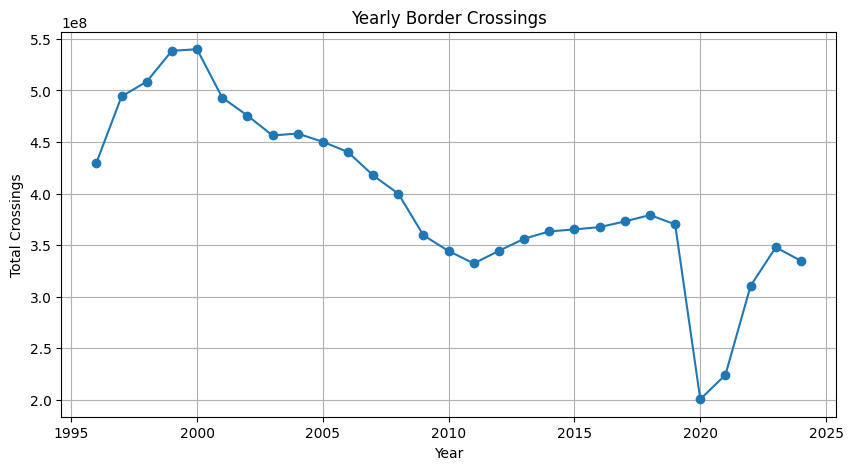

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

df['Date'] = pd.to_datetime(df['Date'], format='mixed', errors='coerce')
df['Year'] = df['Date'].dt.year

yearly_data = df.groupby('Year')['Value'].sum()

plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-')
plt.title("Yearly Border Crossings")
plt.xlabel("Year")
plt.ylabel("Total Crossings")
plt.grid(True)
plt.show()

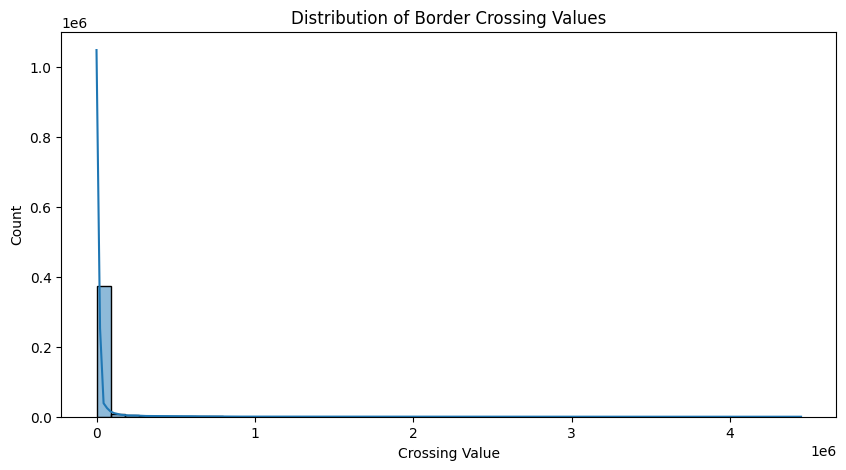

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title("Distribution of Border Crossing Values")
plt.xlabel("Crossing Value")
plt.ylabel("Count")
plt.show()

In [12]:
%pip install folium


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install plotly


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
df_grouped = df.groupby(['Port Code', 'Latitude', 'Longitude'], as_index=False)['Value'].sum()


In [15]:
df_grouped['Port Code'] = df_grouped['Port Code'].astype(str)


In [16]:
import plotly.express as px


In [17]:
fig = px.scatter_geo(df_grouped,
                     lat='Latitude',
                     lon='Longitude',
                     #text='Port Code',  # Now properly displayed
                     size='Value',  # Bubble size based on summed value
                     color='Value',
                     projection='natural earth')

fig.update_layout(title='Ports with Summed Values', geo=dict(showland=True))
fig.show()